In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

This is a collection of a few beautiful plots created in the DataQuest Data Visualization course. Most use object-oriented matplotlib to carefully create nice plots.

# Design for an Audience

In [2]:
top20_deathtoll = pd.read_csv('top20_deathtoll.csv')


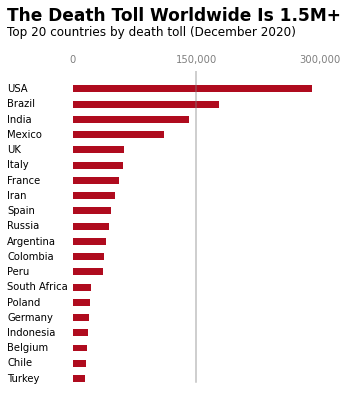

In [5]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.set_xticklabels(['0', '150,000', '300,000'])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
plt.show()

# Storytelling Data Visualization

In [6]:
death_toll = pd.read_csv('covid_avg_deaths.csv')


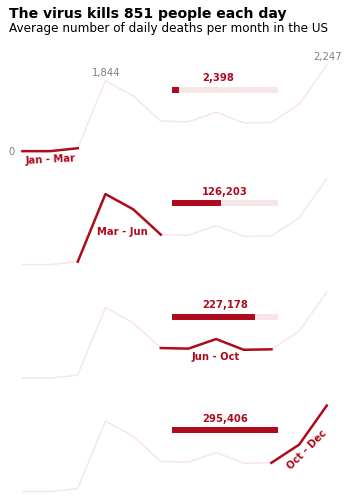

In [7]:
deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')


ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')


ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    ax.text(7.5, 1850, format(death,','), color='#af0b1e',
            weight='bold')
    
plt.show()


### Matplotlib 538 style

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_corr = red_wine.corr()['quality'][:-1]

white_wine = pd.read_csv('winequality-white.csv',sep=';')
white_corr = white_wine.corr()['quality'][:-1]


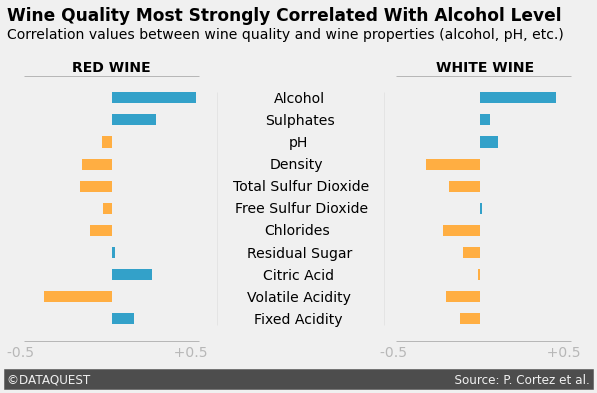

In [6]:
style.use('fivethirtyeight')

positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9', False:'#ffae42'})

positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'})



fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5,
        color=color_map_white)
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1,
       color=color_map_red)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=False)


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8
for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
ax.axvline(x=0.5, ymin=0.1, ymax=0.9, color='grey',
           alpha = 0.1, linewidth=1)

ax.axvline(x=1.45, ymin=0.1, ymax=0.9, color='grey',
           alpha = 0.1, linewidth=1)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(11,color='grey',linewidth=1,alpha=0.5,
           xmin=0.01, xmax=0.32)
ax.text(-0.33,11.2,'RED WINE',weight='bold')

ax.axhline(11,color='grey',linewidth=1,alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.75,11.2,'WHITE WINE',weight='bold')

ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=12)

ax.text(-0.7,13.5,'Wine Quality Most Strongly Correlated With Alcohol Level',size=17,weight='bold')
ax.text(-0.7,12.7,'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')

plt.show()